# Prevendo dados com Scikit-Learn  
  
__Scikit-Learn__ é usado com `NumPy`, `SciPy` e `Matplotlib`, permitindo a criação de ferramentas eficientes para `Machine Learning` e `modelagem estatística` como:

 - Classificação
 - Regressão
 - Clustering
 - Redução de dimensionalidade



![title](images/ml_map.png)

# 1. Prevendo o preço de uma pizza com Scikit-Learn

Suponha que você queira prever o preço de uma pizza. Para isso, vamos criar um modelo de regressão linear para prever o preço da pizza, __baseado em um atributo__ da pizza __que podemos observar__.  
  
Vamos modelar a relação entre:  
  
 - O tamanho (diâmetro) de uma pizza;  
 - E seu preço.  
  
Escreveremos então um programa com __sckit-learn__, que prevê o preço da pizza dado seu tamanho. 


### Vamos supor que você registrou o tamanho e preço de pizzas que você comeu nos últimos meses com a sua família.

<table class="ArticleTableNoBorder">
	<tbody>
		<tr>
			<td><strong>Instância</strong></td>
			<td><strong>Diâmetro(cm)</strong></td>
            <td><strong>Preço(R$)</strong></td>
		</tr>
		<tr>
			<td><code>1</code></td>
			<td>7</td>
            <td>8</td>
		</tr>
		<tr>
			<td><code>2</code></td>
			<td>10</td>
            <td>11</td>
		</tr>
		<tr>
			<td><code>3</code></td>
			<td>15</td>
            <td>16</td>
		</tr>
		<tr>
			<td><code>4</code></td>
			<td>30</td>
            <td>38.5</td>
		</tr>
		<tr>
			<td><code>5</code></td>
			<td>45</td>
            <td>52</td>
		</tr>
	</tbody>
</table>

__NOTE:__  
Essa tabelinha representa dados históricos:  

> Isso porque para trabalhar com Machine Learning é interessante ter dados históricos para trabalhar com eles.

In [1]:
# Importa as bibliotecas Matplotlib e Numpy.
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Cria uma lista que vai representar os Diâmetros (cm) das Pizzas.
diametros = [[7], [10], [15], [30], [45]]

# Cria uma lista que vai representar os Preços (Preços (R$) das Pizzas.
precos = [[8], [11], [16], [38.5], [52]]

__NOTE:__  
O que fizemos na verdade foi converte nossa tabelinha em listas.

### 1.1 Vamos visualizar estes dados construindo um plot/gráfico

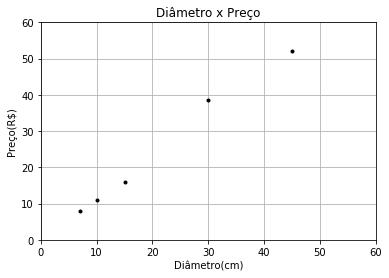

In [3]:
# Cria um plot/gráfico e passa como coordenadas:
# - x - Diâmetro(cm)
# - y - Preços (R$)
plt.plot(diametros, precos, 'k.')

# O método axis() é utilizado para específica o tamanho dos eixo no plot/gráfico:
# - Começa em 0 e termina em 60 no eixo "x";
# - Começa em 0 e termina em 60 no eixo "y".
plt.axis([0, 60, 0, 60])

plt.xlabel('Diâmetro(cm)') # Adiciona um label para o eixo "x".
plt.ylabel('Preço(R$)') # Adiciona um label para o eixo "y".
plt.title('Diâmetro x Preço') # Adiciona um título no plot/gráfico.
plt.grid(True) # Adiciona um Grid no plot/gráfico.

plt.show() # Exibe o plot com o método show().

__NOTE:__  
 - Pelo gráfico podemos ver que existe uma relação positiva entre diâmetro da pizza e seu preço;  
 - À medida que o diâmetro da pizza aumenta, geralmente aumenta também o preço da pizza.

### 1.2 Agora vamos modelar o relacionamento usando regressão linear e criar um modelo para prever o preço da Pizza.

A classe __sklearn.linear_model.LinearRegression__ é um estimador.  
  
> Um estimador prevê um valor baseado em dados observados.  
  
Em __Scikit-Learn__, todos os estimadores implementam os métodos __fit()__ e __predict()__:  
  
 - __fit():__ O método `fit()` é usado para aprender os parâmetros de um modelo.  
 - __predict():__ O método `predict()` é usado para prever o valor de uma variável dependente em relação a uma variável explanatória usando os parâmetros aprendidos.

In [5]:
# Importa o módulo de "Regressão Linear" da biblioteca scikit-learn.
from sklearn.linear_model import LinearRegression

In [6]:
X = [[7], [10], [15], [30], [45]] # Vamos chamar de "X" os dados de diâmetro da Pizza.
Y = [[8], [11], [16], [38.5], [52]] # Vamos chamar de "Y" os dados de preço da Pizza.

In [7]:
# Cria o modelo - Instância da classe "LinearRegression".
modelo = LinearRegression()

In [8]:
# Verifica o tipo do modelo(instância) criado.
type(modelo)

sklearn.linear_model.base.LinearRegression

In [9]:
# Agora vamos treinar o modelo. Para isso utilizamos a função fit().
modelo.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
# Prevendo o preço de uma pizza de 20 cm de diâmetro
# Para tentar prever o preço da pizza nós utilizamos o método predict() e passamos como argumento:
# - Diâmetro da pizza - 20 cm
print("Uma pizza de 20 cm de diâmetro deve custar: R$%.2f" % modelo.predict([20][0]))

Uma pizza de 20 cm de diâmetro deve custar: R$23.41


__NOTE:__  
Veja que o valor que nós passamos foi o diâmetro da pizza igual a "20" e nós não temos nenhuma pizza com diâmetro "20". Logo, o nosso modelo tenta predizer o preço da pizza de acordo com o diâmetro passado.

__NOTE:__  
O método __fit()__ do módulo LinearRegression aprende os parâmetros do seguinte modelo de regressão linear simples:

![title](images/linear.png)

 - __Y__ - é o valor previsto da variável dependente (em nosso exemplo o preço da Pizza)  
 - __X__ - é a variável explanatória (em nosso exemplo o diâmetro da Pizza)  
 - __Alfa__ - é o termo de intercepção ou coeficiente linear  
 - __Beta__ - é o coeficiente de cada variável ou coeficiente angular  
  
__Alfa__ e __Beta__ são parâmetros do modelo que são aprendidos pelo algoritmo de aprendizagem.

### 1.3 Construindo um Scatter Plot do modelo

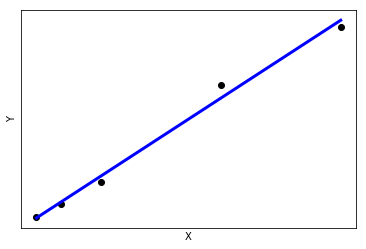

In [11]:
# -----( Cria um Scatter Plot representando o modelo de regressão linear ) -----

# Cria um Scatter e passa como argumento:
# - As coordenadas "x";
# - As coordenas "y"
# - Um atributo "color" com o valor 'black'
plt.scatter(X, Y,  color = 'black')

# Cria um plot e passa os seguinte argumentos para o plot:
# - As coordenadas "x" - Diâmetro (cm)
# - As coordenadas "y" - Predições, ou seja as previsões de acordo com as coordenadas "x".
# - Um atributo "color" como 'blue'
# - A espeçura da linha - linewidth = 3.
plt.plot(X, modelo.predict(X), color = 'blue', linewidth = 3)

plt.xlabel('X') # Adiciona um label para as coordenadas "x".
plt.ylabel('Y') # Adiciona um label para as coordenadas "y".

# Os método xtricks(()) e ytricks(()) quando não passados valores diz para não exibir os números no gráfico.
# Ou seja, xtricks(()) diz para não exibir os números no eixo "x" do gráfico o mesmo se aplica a ytricks(())
plt.xticks(())
plt.yticks(())

plt.show() # Exibe o plot/gráfico.

# 2. Explorando o Dataset Boston Housing

#### Dataset: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

In [12]:
# Importa as bibliotecas necessárias.
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [14]:
# Importa o dataset "load_bost" dos "datasets" do Sklearn(Scikit-Learn)
# - (Você pode tentar ler esse importe da direita para esquerda)
# - O dataset boston já está disponível no scikit-learn. Precisamos apenas carregá-lo.
from sklearn.datasets import load_boston

# Cria ums instância do dataset "load_boston()" e salva no objeto "boston".
boston = load_boston()

In [15]:
# Verificando o tipo do objeto boston.
type(boston)

sklearn.utils.Bunch

In [16]:
# Visualizando o shape do dataset, neste caso são:
# - 506 instâncias (linhas);
# - 13 atributos (colunas).
boston.data.shape

(506, 13)

In [17]:
# Descrição do Dataset
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [18]:
# O "feature_names" mostra os atributos do DataSet, ou seja, as COLUNAS.
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [19]:
# Converte o dataset "boston.data" em um DataFrame pandas.
df = pd.DataFrame(boston.data)

# - Exibe às 10 primeiras linhas do DataFrame com o método head() do Pandas.
# - Outro ponto a observar é que sempre inicia do índice zero(0), igual um array.
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [20]:
# Agora vamos converte os títulos das colunas, ou seja, vamos trocar os títulos números do DataFrame
# pelo os títulos do Dataset "boston.data".
df.columns = boston.feature_names

df.head() # Exibe às 5 primeiras linhas de um DataFrame (default).

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


__NOTE:__  
Todos esses atributos/títulos são as coordenadas __x__ do dataset, ou seja, em uma Regressão Linear são às entradas, mas como exibir as saídas - "y"?

> O atributo __target__.

In [21]:
# boston.target é uma array com o preço das casas.
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [22]:
# Adiciona o preço das casas ao DataFrame, ou seja, vamos criar
# uma coluna no nosso DataFrame com os preços das casas.
df['PRICE'] = boston.target

df.head() # Exibe às 5 primeiras linhas de um DataFrame com o método head() do Pandas.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# 3. Prevendo o Preço das Casas em Boston

 - __Y__ - variável dependente __(preço das casas em Boston)__  
 - __X__ - variáveis independentes ou explanatórias __(todas as outras caracterísricas da casa)__

![title](images/linear.png)

Antes de criar nosso modelo de Machine Learning e tentar predizer os valores, vamos exibir o DataFrame atual:

In [23]:
# Exibe às 5 primeiras linhas do DataFrame com o método head().
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [24]:
# Importa o módulo de Regressão Linear. 
from sklearn.linear_model import LinearRegression

In [25]:
# Agora vamos cria as variáveis "INDEPENDENTE", ou seja, as variáveis que vão representar as
# coordenadas "x". Por isso nós não queremos o preço.
# - Utiliza a função drop('PRICE') para remover o atributo/coluna preço.
X = df.drop('PRICE', axis = 1)

In [26]:
# Exibe o dataset que vai representar as coordenadas "x" na regressão Linear.
# Veja que nós não temos os preços(PRICE).
X.head() # Exibe às 5 primeiras linhas do DataFrame (default).

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


__NOTE:__  
Veja que nós não temos a coluna "PRICE" na representação "X".

In [27]:
# Agora vamos cria uma representação das coordenadas "Y", ou seja, os preços.
# Definindo Y.
Y = df.PRICE

In [28]:
# Exibe às 5 primeiras linhas do DataFrame com as coordenadas "Y".
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

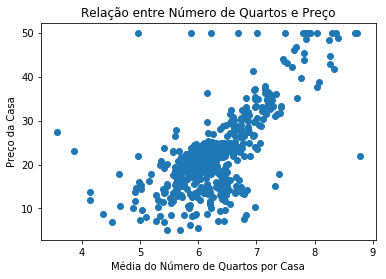

In [29]:
# Agora vamos criar um plot para mostrar:
# - A MÉDIA DE NÚMERO DE QUARTOS POR CADA;
# - PREÇO DA CASA.

# Passa para o Scatter plot os seguintes argumentos:
# - df.RM = MÉDIA DE NÚMERO DE QUATOS POR CASA - vai representar as coordenadas "X";
# - Y = PREÇO DA CASA - vai representar as coordenadas "Y".
plt.scatter(df.RM, Y)

plt.title("Relação entre Número de Quartos e Preço") # Adiciona um título para o Scatter plot.
plt.xlabel("Média do Número de Quartos por Casa") # Adiciona um label no eixo "x".
plt.ylabel("Preço da Casa") # Adiciona um label no eixo "y".

plt.show() # Exibe o Scatter plot com o método show().

Veja que nitidamente parece ter uma relação positiva.


__NOTE:__  
Uma boa pergunta é sempre pergunta faz sentido esse gráfico? Faz, quanto mais quartos, maior o preço da casa.

In [30]:
# Cria ums instância/objeto da classe de Regressão Linear.
regr = LinearRegression()

In [31]:
# Verifica o tipo do objeto.
type(regr)

sklearn.linear_model.base.LinearRegression

In [32]:
# Treina o modelo, ou seja, passa as coordenadas "X" e "Y" respectivamente.
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

__NOTE:__  
Exibe os coeficientes que o nosso modelo calculou. Lembrem da fórmula de Regressão Linear utilizada para encontrar o valor de "Y" e o nosso modelo quem trabalhar com:
 - Alpha
 - Beta
 
![title](images/linear.png)

In [33]:
# Coeficientes
print("Coeficiente: ", regr.intercept_)
print("Número de Coeficientes: ", len(regr.coef_))

Coeficiente:  36.49110328036147
Número de Coeficientes:  13


In [34]:
# Faz uma predição para TODOS OS VALORES DE "X".
regr.predict(X)

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232,
       25.25940048, 23.00433994, 19.5347558 , 11.51696539, 18.91981483,
       18.9958266 , 21.58970854, 20.90534851, 19.55535931, 19.2837957 ,
       19.30000174, 20.52889993, 16.9096749 , 16.17067411, 18.40781636,
       12.52040454, 17.67104565, 15.82934891, 13.80368317, 15.67708138,
       13.3791645 , 15.46258829, 14.69863607, 19.54518512, 20.87309945,
       11.44806825, 18.05900412,  8.78841666, 14.27882319, 13.69097132,
       23.81755469, 22.34216285, 23.11123204, 22.91494157, 31.35826216,
       34.21485385, 28.0207132 , 25.20646572, 24.61192851, 22.94438953,
       22.10150945, 20.42467417, 18.03614022,  9.10176198, 17.20856571,
       21.28259372, 23.97621248, 27.65853521, 24.0521088 , 15.35989132,
       31.14817003, 24.85878746, 33.11017111, 21.77458036, 21.08526739,
       17.87203538, 18.50881381, 23.9879809 , 22.54944098, 23.37068403,
       30.36557584, 25.53407332, 21.11758504, 17.42468223, 20.78

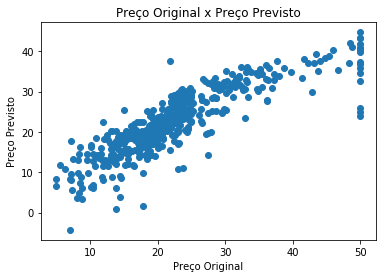

In [35]:
# Cria outro Scatte plot que vai comparar PREÇOS ORIGINAIS x PREÇOS PREVISTOS.
# Passa como argumento para o Scatter plot:
# - df.PRICE - Os preços originais
# - regr.predic(X) - Os preços previstos para todas as coordenadas "X".
plt.scatter(df.PRICE, regr.predict(X))

# Cria labels para as coordenadas.
plt.xlabel("Preço Original")
plt.ylabel("Preço Previsto")

# Cria label para o plot.
plt.title("Preço Original x Preço Previsto")

# Exibe o plot criado com o método show().
plt.show()

__NOTE:__  
Podemos ver que existem alguns erros na predição do preço das casas

In [36]:
# Agora vamos calcular a média de erro, para isso utilizamos a função mean() do NumPy.
# O MSE - Mean Squared Error
mse1 = np.mean((df.PRICE - regr.predict(X)) ** 2)
print(mse1)

21.897779217687496


__NOTE:__  
O que nós fizemos foi "subtrair" os __PREÇOS ATUAIS__ pelo as __PREDIÇÕES__.

In [37]:
# Aplicando regressão linear para APENAS UMA VARIÁVEL e calculando o MSE
regr = LinearRegression()
regr.fit(X[['PTRATIO']], df.PRICE)
mse2 = np.mean((df.PRICE - regr.predict(X[['PTRATIO']])) ** 2)
print(mse2)

62.65220001376926


O MSE aumentou, indicando que uma única característica não é um bom predictor para o preço das casas.

Na prática, você não vai implementar regressão linear em todo o dataset. Você vai dividir o dataset em datasets de treino e de teste. Assim, você treina seu modelo nos dados de treino e depois verifica como o modelo se comporta nos seus dados de teste. Vejamos:

# 4. Dividindo os dados em:
 - Treino
 - Test
 
Podemos criar nossos datasets de treino de forma manual, mas claro este não é método correto. Vamos então dividir os datasets randomicamente. O Scikit-Learn provê uma função chamada __train_test_split()__ para isso.

In [38]:
# Importa a função "train_test_split" do "model_selection" do sklearn.
from sklearn.model_selection import train_test_split

In [39]:
# Cria 4 variáveis:
# - Treino para "X", Teste para "X";
# - Treino para "Y", Test para "Y";
#
# Passa como argumento para a função "train_test_split":
# - As coordenadas "X";
# - Os preços originais;
# - Qual vai ser o tamanho de test - test_size = 0.33 (30%, ou seja restam 70% para treino);
# - O random_state = 5 - Para que seja totalmente randomizado.

# Dividindo X e Y em dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, df.PRICE, test_size = 0.33, random_state = 5)

In [40]:
# Imprime o shape dos datasets, ou seja, as dimensões.
print(X_treino.shape, X_teste.shape, Y_treino.shape, Y_teste.shape)

(339, 13) (167, 13) (339,) (167,)


In [41]:
# Cria novamente uma instância/objeto da classe LinearRegression()
regr = LinearRegression()

In [42]:
# Passa como argumento para a função fit() os dados de treino:
# - X_treino - Representa as coordenadas "X";
# - Y_treino - Representa as coordenadas "Y".
regr.fit(X_treino, Y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
# agora vamos ter duas predições tambémm:
# - Predições de treino;
# - Predições de test.
#
# Definindo os dados de treino e teste
pred_treino = regr.predict(X_treino)
pred_teste = regr.predict(X_teste)

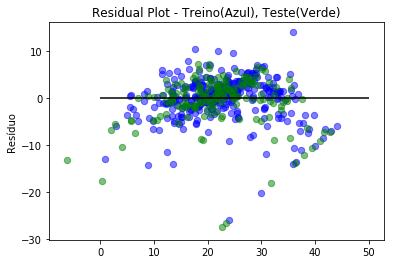

In [45]:
# Cria 2 Scatter plot para exibir os dados dos modelos de treino e de test.
# Comparando preços originais x preços previstos
plt.scatter(regr.predict(X_treino), regr.predict(X_treino) - Y_treino, c = 'b', s = 40, alpha = 0.5)
plt.scatter(regr.predict(X_teste), regr.predict(X_teste) - Y_teste, c = 'g', s = 40, alpha = 0.5)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.ylabel("Resíduo")
plt.title("Residual Plot - Treino(Azul), Teste(Verde)")
plt.show()